# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.19 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. State and Action Spaces

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. The RL agent 

The agent can be found in the file ddpg_agent.py, which implements a standard DDPG with some adjustments that can be seen in the hyperparameters setup.

In [7]:
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from workspace_utils import active_session
import ddpg_agent as config

def run_agent(noise=True, n_episodes=1000, max_t=1000, print_every=10):
    scores_deque = deque(maxlen=print_every)
    mean_score= []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        for t in range(max_t):
            actions = agent.act(states, add_noise=noise)

            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished            
            
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        scores_deque.append(scores.mean())
        mean_score.append(scores.mean())
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque) > 30:
            print('\rProblem solved in {} episodes! \tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            return mean_score
    return mean_score

### 4. Set up agent hyperparameters

In [ ]:
config.BUFFER_SIZE = int(1e6)  # replay buffer size
config.BATCH_SIZE = 128        # minibatch size
config.GAMMA = 0.99            # discount factor
config.TAU = 1e-3              # for soft update of target parameters
config.LR_ACTOR = 1e-4         # learning rate of the actor 
config.LR_CRITIC = 1e-4        # learning rate of the critic
config.LEARN_EVERY = 1         # learn every n steps
config.LIMIT_GRADIENTS = True  # clamp gradients
config.FIRST_LAYER_SIZE = 400  # size of first layer of both actor and critic
config.SECOND_LAYER_SIZE = 300 # size of first layer of both actor and critic
config.DROP_RATE = 0.0         # dropout rate
config.EPSILON = 1.0           # initial factor for the noise
config.EPS_DECAY = 0.999       # noise decay
config.EPS_MIN = 0.0001        # minimum value for the noise factor
config.BN_ACTIVE =True         # enable batch normalization in actor and critic

### 5. Train the agent and visualize reward

Running DDPG...
Episode 10	Average Score: 0.84
Episode 20	Average Score: 1.54
Episode 30	Average Score: 2.96
Episode 40	Average Score: 3.37
Episode 50	Average Score: 4.90
Episode 60	Average Score: 7.57
Episode 70	Average Score: 7.88
Episode 80	Average Score: 12.82
Episode 90	Average Score: 17.38
Episode 100	Average Score: 26.17
Problem solved in 106 episodes!	Average Score: 30.74


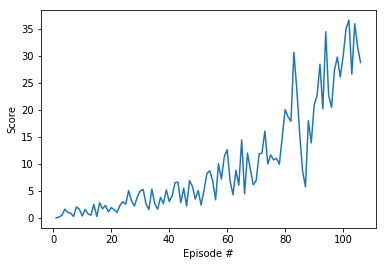

In [10]:
agent = config.Agent(state_size, action_size, seed=0)

with active_session():
    print("Running DDPG...")
    scores = run_agent()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [6]:
env.close()